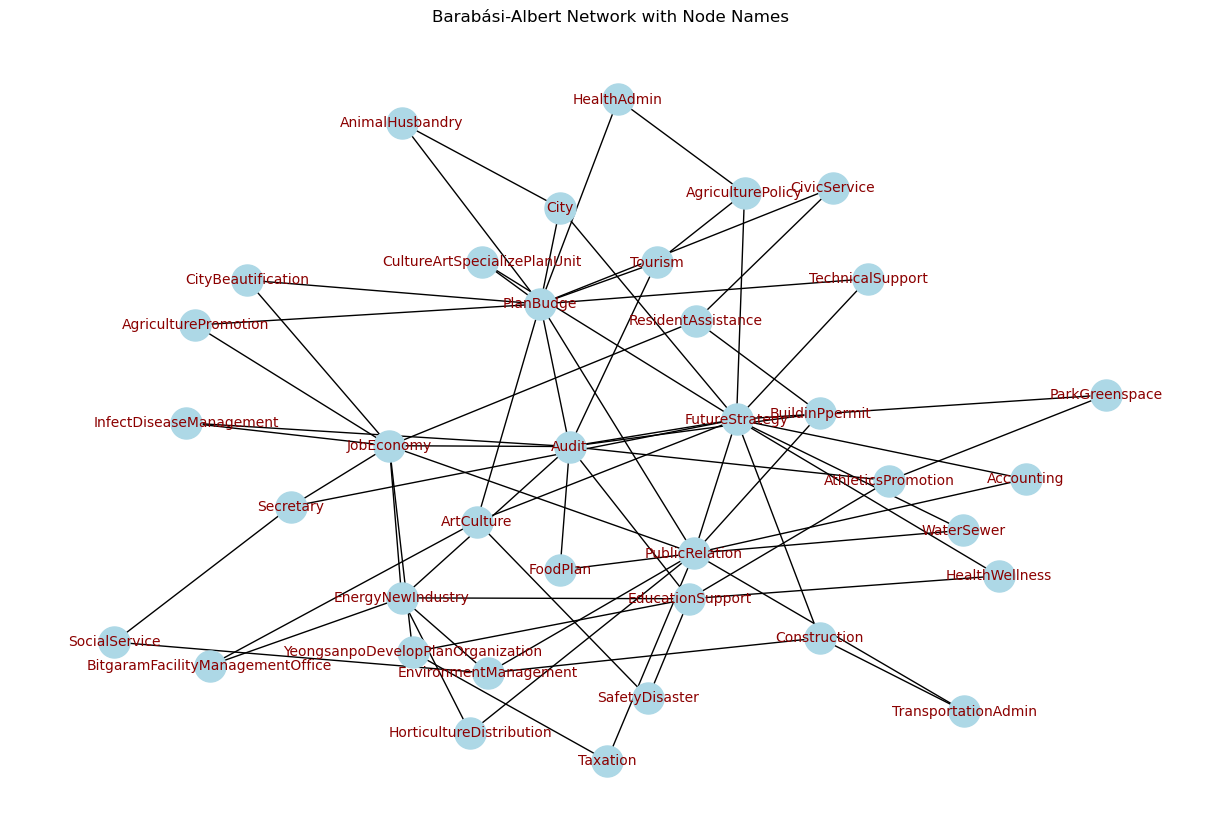

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

nodes_file = "Department_Collaborate_node.csv"
nodes_df = pd.read_csv(nodes_file, header=None, names=["id", "label"])

# 2. 바라바시-앨버트 네트워크 생성
n = len(nodes_df)  # 총 노드 수
m = 2  # 새 노드가 연결할 기존 노드의 수
ba_graph = nx.barabasi_albert_graph(n, m)

# 3. 노드 이름 속성 추가
for i, row in nodes_df.iterrows():
    ba_graph.nodes[row['ID'] - 1]['name'] = row['Name']  # NetworkX 노드는 0부터 시작

# 4. 네트워크 시각화
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(ba_graph, seed=42)  # 시각화를 위한 레이아웃
nx.draw(
    ba_graph, pos, with_labels=True, labels=nx.get_node_attributes(ba_graph, 'name'),
    node_size=1500, node_color="lightblue", font_size=10, font_color="black"
)
plt.title("Barabási-Albert Network")
plt.show()

# 5. 네트워크를 엣지 리스트로 저장
nx.write_edgelist(ba_graph, "ba_network_edges.csv", delimiter=",")
